# Rental Price Prediction


In this project we will try to predict the price of rental apartments in Berlin by extracting data via Selenium

In [2]:
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException 
import time
from geopy.geocoders import Nominatim
from googletrans import Translator

import winsound
import pywhatkit


# Crawling

At this step we go for each page and take the urls of the uloaded apartments

In [21]:
def get_urls(page_number):
    page_number = str(page_number)
    web = 'https://www.wg-gesucht.de/1-zimmer-wohnungen-und-wohnungen-in-Berlin.8.1+2.1.'+page_number+'.html?pagination=1&pu='
    PATH = r'C:\Program Files (x86)\chromedriver.exe'
    driver_url = webdriver.Chrome(PATH)
    driver_url.get(web)
    time.sleep(10)
    try:
        driver.find_element_by_xpath("//a[@class='cmpboxbtn cmpboxbtnyes']").click()
    except:
        pass

     #capcha alret
    try:
        WebDriverWait(driver, 10).until(EC.frame_to_be_available_and_switch_to_it((By.CSS_SELECTOR,"iframe[name^='a-'][src^='https://www.google.com/recaptcha/api2/anchor?']")))
        #WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, "//span[@id='recaptcha-anchor']"))).click()
        print('capcha')
        winsound.Beep(1000, 500)
        winsound.Beep(1000, 500)
        winsound.Beep(1000, 500)
        pywhatkit.sendwhatmsg('+9720545488595', 'Capcha', int(time.ctime()[11:13]), int(time.ctime()[14:16]) + 2 ,tab_close=False)
        input("Press Enter to continue...")
    except:
        pass
    
    
    urls = []
    url_list = driver_url.find_elements_by_xpath('//h3[@class="truncate_title noprint"]/a')

    for row in url_list:
        urls.append(row.get_attribute('href'))
    driver_url.quit()
    return urls

here we get all the parameters for the urls that we took
we are taking data from German site so we use Translator() to translate to English

also the site have Capcha v2 which you need to solve it by pressing the right pictures, so if there would be a Capcha it will use winsound.Beep which will beep 3 times and also send me Whatsup message with pywhatkit.sendwhatmsg if im not next to the computer

I learned Selenium from two youtubers : 
1) https://www.youtube.com/watch?v=lTypMlVBFM4&t=245s&ab_channel=JohnWatsonRooney

2) https://www.youtube.com/watch?v=Xjv1sY630Uc&ab_channel=TechWithTim

In [4]:
apartment_url = []
size = []
price = []
numOfRooms = []
buildingCond = []
floor = []
hasKitchen = []
heatingType = []
longitude = []
latitude = []
bus_walk = []
parking = []


#folder:
hasWashingMachine = []
hasBalcony = []
hasElevetor = []
###

geolocator = Nominatim(user_agent='myapplication')
translator = Translator()


PATH = r'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(PATH)

for page in range(0,100):
    print(f'page : {page+1}')
    urls = get_urls(page)
    for url in urls:
        if "sort_order" in url: 
            continue
        print(url)
        apartment_url.append(url)
        driver.get(url)
        time.sleep(5)
        
        #accept cookies
        try:
            driver.find_element_by_xpath("//a[@class='cmpboxbtn cmpboxbtnyes']").click()
        except Exception:
            pass
        
        
        #capcha alret
        try:
            WebDriverWait(driver, 10).until(EC.frame_to_be_available_and_switch_to_it((By.CSS_SELECTOR,"iframe[name^='a-'][src^='https://www.google.com/recaptcha/api2/anchor?']")))
            #WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, "//span[@id='recaptcha-anchor']"))).click()
            print('capcha')
            winsound.Beep(1000, 500)
            winsound.Beep(1000, 500)
            winsound.Beep(1000, 500)
            pywhatkit.sendwhatmsg('+9720545488595', 'Capcha', int(time.ctime()[11:13]), int(time.ctime()[14:16]) + 2 ,tab_close=False)
            input("Press Enter to continue...")    
        except:
            pass 
            

        try:
            size.append(driver.find_elements_by_xpath("//label[@class='amount']")[0].text)
            numOfRooms.append(driver.find_elements_by_xpath("//label[@class='amount']")[1].text)
            price.append(driver.find_elements_by_xpath("//label[@class='amount']")[2].text)
        except NoSuchElementException:
            size.append(None)
            numOfRooms.append(None)
            price.append(None)
     


    #floor
        try:
            child= driver.find_element_by_xpath("//span[@class='mdi mdi-office-building mdi-36px noprint']")
            parent= child.find_element_by_xpath("..")
            translated = translator.translate(parent.get_attribute("innerText").split('\n')[1])
            floor.append(translated.text)
        except NoSuchElementException:
            floor.append(None)
    #kitchen        
        try:
            child= driver.find_element_by_xpath("//span[@class='mdi mdi-silverware-fork-knife mdi-36px noprint']")
            parent= child.find_element_by_xpath("..")
            translated = translator.translate(parent.get_attribute("innerText").split('\n')[1])
            hasKitchen.append(translated.text)
        except NoSuchElementException:
            hasKitchen.append(None)

    #heating        
        try:
            child= driver.find_element_by_xpath("//span[@class='mdi mdi-fire mdi-36px noprint']")
            parent= child.find_element_by_xpath("..")
            translated = translator.translate(parent.get_attribute("innerText").split("\n")[1])
            heatingType.append(translated.text)
        except NoSuchElementException:
            heatingType.append(None)  


    #folder:
        try:
            child= driver.find_element_by_xpath("//span[@class='mdi mdi-folder mdi-36px noprint']")
            parent= child.find_element_by_xpath("..")
            folder = parent.get_attribute("innerText").split("\n")[1]
            if 'Waschmaschine' in folder:
                hasWashingMachine.append(1)
            else:
                hasWashingMachine.append(0)
            if 'Balkon' in folder:
                hasBalcony.append(1)
            else:
                hasBalcony.append(0)
            if 'Aufzug' in folder:
                hasElevetor.append(1)
            else:
                hasElevetor.append(0)
        except NoSuchElementException:
            print("no folder")
            hasWashingMachine.append(0)
            hasBalcony.append(0)
            hasElevetor.append(0)

    #location:
        try:
            adress = driver.find_element_by_xpath("//div[@class='col-sm-4 mb10']/a")
            adress = adress.get_attribute("innerText").replace('\n',' ')
            location = geolocator.geocode(adress)
            longitude.append(location.longitude)
            latitude.append(location.latitude)
        except:
            longitude.append(None)
            latitude.append(None)
            
            
            
    #bus walk:
        try:
            child= driver.find_element_by_xpath("//span[@class='mdi mdi-bus mdi-36px noprint']")
            parent= child.find_element_by_xpath("..")
            bus_walk.append(int(parent.get_attribute("innerText").split('\n')[1].split(' ')[0]))
        except NoSuchElementException:
            bus_walk.append(None) 
    
    # parking:
        try:
            child= driver.find_element_by_xpath("//span[@class='mdi mdi-car mdi-36px noprint']")
            parent= child.find_element_by_xpath("..")
            parking.append(1)
        except NoSuchElementException:
            parking.append(0)
            


            

driver.quit()
   
    
        

In [28]:
df = pd.DataFrame(data = {'size':size,'rooms':numOfRooms,'price':price,'floor':floor,'kitchen':hasKitchen,
                          'heating Type':heatingType,'longitude':longitude,'latitude':latitude,'WashingMach':hasWashingMachine,
                          'Balcony':hasBalcony,'Elevetor':hasElevetor,'bus_walking':bus_walk,'parking':parking,'url':apartment_url})
df

<ipython-input-28-c298516cc8cc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor'][i] = a[df['floor'][i]]


size rooms  price         floor      kitchen      heating Type  \
0    65m²     2  1200€     1st floor  own kitchen   central heating   
1    50m²     2    55€     3rd floor         None   central heating   
2    65m²     2   850€     3rd floor  own kitchen              None   
3    85m²     3  1100€     3rd floor         None       gas heating   
4    90m²     4   900€  ground floor  own kitchen       gas heating   
5    50m²   1,5   650€          None  own kitchen              None   
6    53m²     2  1200€     4th floor         None   central heating   
7    52m²     2    25€     1st floor         None       gas heating   
8    56m²     2   500€     2nd Floor         None              None   
9   100m²     3  1000€     4th floor  own kitchen  district heating   
10   85m²     2   490€     5th floor         None   central heating   
11  100m²     3   550€          None         None              None   
12   60m²     2   680€         attic  own kitchen              None   
13  116m²     3  2800€     4th floor  own kitchen       gas heating   
14  105m²     4  2000€     4th floor  own kitchen  district heating   
15   70m²     2  1330€     3rd floor         None   central heating   
16   33m²     1   650€  ground floor  own kitchen              None   
17   57m²     2  1200€         attic  own kitchen  district heating   
18   67m²     2   850€     4th floor  own kitchen              None   
19   30m²     1   750€     2nd Floor  own kitchen              None   
20  123m²     3  2075€         attic  own kitchen  district heating   
21   58m²     2   380€     4th floor         None              None   
22   62m²     2   750€     1st floor         None   central heating   
23   26m²     1   450€      basement         None  district heating   
24   56m²     2   690€          None         None              None   
25   32m²     1   417€     4th floor  own kitchen   central heating   

    longitude   latitude  WashingMach  Balcony  Elevetor  bus_walking  \
0   13.450663  52.508722            1        1         0          2.0   
1   13.403059  52.498443            1        0         0          5.0   
2   13.368383  52.549651            1        1         0          2.0   
3   13.424201  52.532498            1        1         0          2.0   
4   13.204019  52.548280            1        0         0          6.0   
5   13.384552  52.538283            0        1         0          NaN   
6   13.423312  52.548025            0        0         0          2.0   
7   13.417041  52.536043            1        1         0          5.0   
8   13.328373  52.491616            1        1         1          1.0   
9   13.421546  52.473161            1        1         0          5.0   
10  13.447230  52.479210            1        1         0          3.0   
11  13.414353  52.552183            1        1         0          1.0   
12  13.450199  52.479673            1        0         1          2.0   
13  13.413372  52.511772            1        1         0          2.0   
14  13.421413  52.465626            1        1         1          NaN   
15  13.385706  52.478304            1        0         1          1.0   
16        NaN        NaN            1        0         0          3.0   
17  13.341152  52.530524            1        1         1          2.0   
18  13.436766  52.469361            1        1         1          5.0   
19  13.330813  52.490735            0        0         1          3.0   
20  13.417188  52.506298            0        0         1         20.0   
21  13.429892  52.488675            0        0         0          NaN   
22        NaN        NaN            1        0         1          NaN   
23  13.348253  52.432909            1        1         0          NaN   
24  13.498674  52.515940            1        1         0          5.0   
25  13.544484  52.538663            0        1         1         10.0   

    parking                                                url  
0         1  https://www.wg-gesucht.de/wohnungen-i

In [84]:
df.to_csv(r"C:\Users\Kostya\Desktop\Apartments\apartments1.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   size          26 non-null     object 
 1   rooms         26 non-null     object 
 2   price         26 non-null     object 
 3   floor         23 non-null     object 
 4   kitchen       14 non-null     object 
 5   heating Type  16 non-null     object 
 6   longitude     24 non-null     float64
 7   latitude      24 non-null     float64
 8   WashingMach   26 non-null     int64  
 9   Balcony       26 non-null     int64  
 10  Elevetor      26 non-null     int64  
 11  bus_walking   21 non-null     float64
 12  parking       26 non-null     int64  
 13  url           26 non-null     object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ KB


In [392]:
import pandas as pd
import numpy as np
import matplotlib as mpl # לצרגים גרפיים
from matplotlib import pyplot as plt
import seaborn as sns # לייצור גרפים ופלוטים עם שיפורים
import mpu # for calculate distance between 2 coordinates

In [393]:
df = pd.read_csv(r"C:\Users\eliko\OneDrive\שולחן העבודה\ds\apartments_data10.csv")
df.rename(columns = {'size':'aprt_size'}, inplace = True)
pd.set_option("max_colwidth", 100)
df

aprt_size rooms  price                  floor      kitchen  \
0          33m²     1   850€              2nd Floor  own kitchen   
1          40m²   1,5   850€              3rd floor  own kitchen   
2          35m²     1   799€                    NaN          NaN   
3          33m²     1   819€                    NaN          NaN   
4          26m²     1   600€  higher than 5th floor  own kitchen   
...         ...   ...    ...                    ...          ...   
12003      48m²     2    20€              1st floor          NaN   
12004      56m²     2    50€              3rd floor          NaN   
12005     110m²     4  2570€              2nd Floor          NaN   
12006      80m²     2   490€              3rd floor  own kitchen   
12007      20m²     3   350€  higher than 5th floor          NaN   

          heating Type  longitude   latitude  WashingMach  Balcony  Elevetor  \
0      central heating  13.502420  52.507540          1.0      1.0       0.0   
1                  NaN  13.351857  52.500805          1.0      0.0       0.0   
2                  NaN  13.295509  52.473641          1.0      0.0       1.0   
3                  NaN  13.265390  52.458389          1.0      1.0       1.0   
4      central heating  13.513513  52.505395          1.0      1.0       1.0   
...                ...        ...        ...          ...      ...       ...   
12003      gas heating  13.424177  52.536675          0.0      0.0       0.0   
12004              NaN  13.404982  52.547848          1.0      1.0       1.0   
12005              NaN  13.292760  52.442228          0.0      1.0       1.0   
12006  central heating  13.427734  52.490051          1.0      1.0       0.0   
12007              NaN  13.513839  52.496504          1.0      1.0       1.0   

       parking  bus_walking  \
0            0            3   
1            0           12   
2            0           11   
3            0           15   
4            0            1   
...        ...          ...   
12003        0           14   
12004        0            2   
12005        1           15   
12006        0           15   
12007        0            2   

                                                                                       url  
0          https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Rummelsburg.8115839.html  
1                   https://www.wg-gesucht.de/wohnungen-in-Berlin-Schoeneberg.9331661.html  
2        https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Schmargendorf.8657017.html  
3        https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Schmargendorf.8656960.html  
4      https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Friedrichsfelde.9303959.html  
...                                                                                    ...  
12003           https://www.wg-gesucht.de/wohnungen-in-Berlin-Prenzlauer-Berg.4515444.html  
12004           https://www.wg-gesucht.de/wohnungen-in-Berlin-Prenzlauer-Berg.7411412.html  
12005                    https://www.wg-gesucht.de/wohnungen-in-Berlin-Berlin.7714881.html  
12006                 https://www.wg-gesucht.de/wohnungen-in-Berlin-Neukoelln.7710229.html  
12007                    https://www.wg-gesucht.de/wohnungen-in-Berlin-Berlin.7705221.html  

[12008 rows x 14 columns]

drop the duplicates apartaments in our DataFrame

In [394]:
#drop duplicates
df.drop_duplicates(subset =['url'],ignore_index=True,inplace = True)

all the columns bellow had NaN values that we replaced into other values (Categorical and Numeric) in order to repair the data insted of deleting it

In [395]:
#fill nan data
df["kitchen"].fillna("Unavailable", inplace = True)
df["floor"].fillna('ground floor', inplace = True)
df['heating Type'].fillna('Unavailable',inplace=True)
df['Balcony'].fillna(0,inplace=True)
df['Elevetor'].fillna(0,inplace=True)
df['WashingMach'].fillna(0,inplace=True)

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aprt_size     9924 non-null   object 
 1   rooms         9924 non-null   object 
 2   price         9924 non-null   object 
 3   floor         9924 non-null   object 
 4   kitchen       9924 non-null   object 
 5   heating Type  9924 non-null   object 
 6   longitude     9924 non-null   float64
 7   latitude      9924 non-null   float64
 8   WashingMach   9924 non-null   float64
 9   Balcony       9924 non-null   float64
 10  Elevetor      9924 non-null   float64
 11  parking       9924 non-null   int64  
 12  bus_walking   9924 non-null   int64  
 13  url           9924 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [397]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

getKmFromCentral is a function that calculates the distance between 2 coordinates and with that we calculated all the distances from the center of berlin.
link to the resource: 
https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude


In [398]:
#central of berlin
# latBer = 52.531677
# longBer = 13.381777

def getKmFromCentral(lat2,lon2):
   # Point one of center berlin
    lat1 = 52.531677
    lon1 = 13.381777

    # What you were looking for
    dist = mpu.haversine_distance((lat1, lon1), (lat2, lon2))
    return dist
        
df["dist"] = np.nan
for i in range(len(df["dist"])):
    df["dist"][i] = getKmFromCentral(df["latitude"][i],df["longitude"][i])


<ipython-input-398-4f1bfc32e64a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist"][i] = getKmFromCentral(df["latitude"][i],df["longitude"][i])


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aprt_size     9924 non-null   object 
 1   rooms         9924 non-null   object 
 2   price         9924 non-null   object 
 3   floor         9924 non-null   object 
 4   kitchen       9924 non-null   object 
 5   heating Type  9924 non-null   object 
 6   longitude     9924 non-null   float64
 7   latitude      9924 non-null   float64
 8   WashingMach   9924 non-null   float64
 9   Balcony       9924 non-null   float64
 10  Elevetor      9924 non-null   float64
 11  parking       9924 non-null   int64  
 12  bus_walking   9924 non-null   int64  
 13  url           9924 non-null   object 
 14  dist          9924 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 1.1+ MB


we created a dict in order to replace all the "String" values into numeric and also removing all the data that not needed for the convert.

In [400]:
#replace
df.reset_index(drop=True, inplace=True)

floor_dict = {'2nd Floor':2,'3rd floor':3,'higher than 5th floor':6,'1st floor':1,'ground floor':0,
              '5th floor':5,'basement':-1,'4th floor':4,'mezzanine':-2,'attic':-2}

for i in range(len(df)):
    df['aprt_size'][i] = df['aprt_size'][i].replace('m²', '')
    df['rooms'][i] = df['rooms'][i].replace(',', '.')
    df['price'][i] = df['price'][i].replace('€', '')
    df['floor'][i] = floor_dict[df['floor'][i]]
#change object to float\int
df = df.astype({'aprt_size':'int','rooms':'float','price':'int'})

<ipython-input-400-a5f1859f8f25>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aprt_size'][i] = df['aprt_size'][i].replace('m²', '')
<ipython-input-400-a5f1859f8f25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms'][i] = df['rooms'][i].replace(',', '.')
<ipython-input-400-a5f1859f8f25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i] = df['price'][i].replace('€', '')
<ipython-input-400-a5f1859f8f25>:11

# EDA

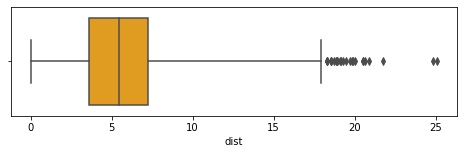

In [401]:
fig = plt.figure(figsize=(8,2))
sns.boxplot(df.dist, whis=3, color="orange")

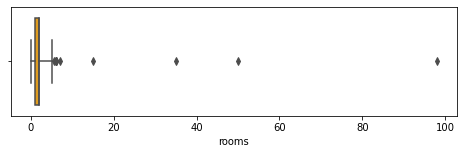

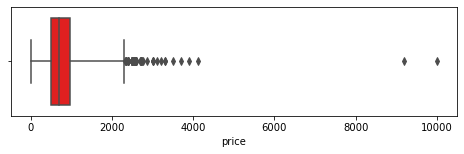

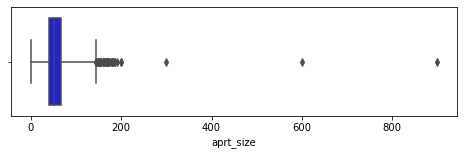

In [402]:
fig = plt.figure(figsize=(8,2))
sns.boxplot(df.rooms, whis=3, color="orange")

fig = plt.figure(figsize=(8,2))
sns.boxplot(df.price, whis=3, color="red")

fig = plt.figure(figsize=(8,2))
sns.boxplot(df.aprt_size, whis=3, color="blue")

In [ ]:
df = df[df['aprt_size'] <= 200] #170
df = df[df['rooms'] <= 6]#5
df = df[df['rooms']>=1]
#starting point
df = df[df['price'] >= 200]     #150
df = df[df['aprt_size'] >= 14]  #10
df['price'][df['price'] > 3500] = np.nan

deleting outliers according to the checks we've done and the graphs above

In [403]:
df[(df['rooms'] == 1) & (df['aprt_size'] >= 60)] = np.nan   #50 #
df[(df['rooms'] == 2) & (df['aprt_size'] >= 90)] = np.nan  #90  
df[(df['rooms'] == 3) & (df['aprt_size'] <= 20)] = np.nan   #20 
df[(df['rooms'] == 4) & (df['aprt_size'] <= 50)] = np.nan   #50
df[(df['rooms'] == 5) & (df['aprt_size'] <= 110)] = np.nan  #110
df[(df['rooms'] == 6) & (df['aprt_size'] <= 150)] = np.nan  #150
df[(df['price'] >=2700) & (df['aprt_size'] <= 130)] =np.nan
df[(df['price'] >=500)&(df['price'] <=1000) & (df['aprt_size'] >=100)] =np.nan
df[(df['price'] >=2400) & (df['aprt_size'] <= 50)] =np.nan
df[(df['price'] <1350) & (df['aprt_size'] >= 150)] =np.nan
df[(df['price'] <500) & (df['aprt_size'] >= 75)] =np.nan
df[(df['price'] <300) & (df['aprt_size'] >= 40)] = np.nan
df[(df['price'] <2500) & (df['price'] >= 1000) & (df['aprt_size'] <=40)]=np.nan
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

we added this column for better corrolations between the columns

In [404]:
df["Score"] = 0
for i in range(len(df["rooms"])):
    if df["rooms"][i] <=6 and df["rooms"][i] >=4:
        df["Score"][i]= df["Score"][i] + 2
        
    if df["floor"][i] <=6 and df["floor"][i] >=4:
        df["Score"][i]= df["Score"][i] + 2
        
    if df["Balcony"][i] == 1:
        df["Score"][i]= df["Score"][i] + 1
        
    if df["WashingMach"][i] == 1:
        df["Score"][i]= df["Score"][i] + 1
    if df['aprt_size'][i] > 50:
        if df['aprt_size'][i] > 80:
            df["Score"][i]= df["Score"][i] + 2
        else:
            df["Score"][i]= df["Score"][i] + 1
    else:
        df["Score"][i]= df["Score"][i] - 1
        
    if df["Elevetor"][i] == 0 and df["floor"][i] <=6 and df["floor"][i] >=4:
        df["Score"][i]= df["Score"][i] -2
        
    if df["rooms"][i] <=3.5 and df["rooms"][i] >=2.5:
        df["Score"][i]= df["Score"][i] + 1
        
    if df["floor"][i] <=3 and df["floor"][i] >=1:
        df["Score"][i]= df["Score"][i] + 1
              
    if df["dist"][i] < 24:
        if df["dist"][i] <= 5:
            df["Score"][i]= df["Score"][i] +2
        elif df["dist"][i] <= 10:
            df["Score"][i]= df["Score"][i] +2
        else:
            df["Score"][i]= df["Score"][i] +1
    else:
        df["Score"][i]= df["Score"][i] - 1 
    if df['bus_walking'][i] <=10:
        df["Score"][i] = df["Score"][i] +1
    if df['parking'][i] == 1:
        df["Score"][i] = df["Score"][i] +2
    
        
#0.34

<ipython-input-404-668abf36f073>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Score"][i]= df["Score"][i] + 1
<ipython-input-404-668abf36f073>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Score"][i]= df["Score"][i] + 1
<ipython-input-404-668abf36f073>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Score"][i]= df["Score"][i] - 1
<ipython-input-404-668abf36f073>:29: SettingWithCopyWarning: 
A value is trying to be

In [405]:
df

aprt_size  rooms   price floor      kitchen     heating Type  longitude  \
0          33.0    1.0   850.0     2  own kitchen  central heating  13.502420   
1          40.0    1.5   850.0     3  own kitchen      Unavailable  13.351857   
2          35.0    1.0   799.0     0  Unavailable      Unavailable  13.295509   
3          33.0    1.0   819.0     0  Unavailable      Unavailable  13.265390   
4          26.0    1.0   600.0     6  own kitchen  central heating  13.513513   
...         ...    ...     ...   ...          ...              ...        ...   
8855       77.0    2.0   900.0     1  own kitchen      Unavailable  13.206772   
8856      105.0    3.5  1200.0    -2  own kitchen      gas heating  13.320107   
8857       56.0    1.0   742.0     2  own kitchen       coal stove  13.466438   
8858       25.0    1.0    25.0     1  Unavailable      Unavailable  13.367760   
8859       74.0    2.0   710.0     2  own kitchen  central heating  13.178733   

       latitude  WashingMach  Balcony  Elevetor  parking  bus_walking  \
0     52.507540          1.0      1.0       0.0      0.0          3.0   
1     52.500805          1.0      0.0       0.0      0.0         12.0   
2     52.473641          1.0      0.0       1.0      0.0         11.0   
3     52.458389          1.0      1.0       1.0      0.0         15.0   
4     52.505395          1.0      1.0       1.0      0.0          1.0   
...         ...          ...      ...       ...      ...          ...   
8855  52.499587          1.0      1.0       1.0      0.0         10.0   
8856  52.472577          1.0      0.0       0.0      1.0         12.0   
8857  52.519140          0.0      0.0       0.0      0.0          4.0   
8858  52.464872          0.0      0.0       0.0      0.0          9.0   
8859  52.539997          0.0      1.0       0.0      0.0         14.0   

                                                                                        url  \
0           https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Rummelsburg.8115839.html   
1                    https://www.wg-gesucht.de/wohnungen-in-Berlin-Schoeneberg.9331661.html   
2         https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Schmargendorf.8657017.html   
3         https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Schmargendorf.8656960.html   
4       https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Friedrichsfelde.9303959.html   
...                                                                                     ...   
8855              https://www.wg-gesucht.de/wohnungen-in-Berlin-Friedrichshain.9297393.html   
8856  https://www.wg-gesucht.de/wohnungen-in-Berlin-Charlottenburg-Wilmersdorf.9289281.html   
8857     https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Friedrichshain.9283414.html   
8858     https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Charlottenburg.9105390.html   
8859                     https://www.wg-gesucht.de/wohnungen-in-Berlin-Spandau.7606020.html   

           dist  Score  
0      8.592746      5  
1      3.985383      3  
2      8.703004      2  
3     11.335478      2  
4      9.380413      6  
...         ...    ...  
8855  12.367991      6  
8856   7.785304      8  
8857   5.894688      5  
8858   7.488733      3  
8859  13.764172      4  

[8860 rows x 16 columns]

deleting more outliers

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 8859
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aprt_size     8667 non-null   float64
 1   rooms         8667 non-null   float64
 2   price         8667 non-null   float64
 3   floor         8667 non-null   object 
 4   kitchen       8667 non-null   object 
 5   heating Type  8667 non-null   object 
 6   longitude     8667 non-null   float64
 7   latitude      8667 non-null   float64
 8   WashingMach   8667 non-null   float64
 9   Balcony       8667 non-null   float64
 10  Elevetor      8667 non-null   float64
 11  parking       8667 non-null   float64
 12  bus_walking   8667 non-null   float64
 13  url           8667 non-null   object 
 14  dist          8667 non-null   float64
 15  Score         8667 non-null   int64  
dtypes: float64(11), int64(1), object(4)
memory usage: 1.1+ MB


In [408]:
df.reset_index(drop=True,inplace=True)

this function should convert all the columns bellow into binary and split them according to the df.column.unique() value.

In [409]:
catagory_list=['floor','kitchen','heating Type']
for catag in catagory_list:
        df[catag]= df[catag].astype('category')
        df=pd.get_dummies(df,columns=[catag],prefix=[catag])

In [410]:
df.describe()

aprt_size        rooms        price    longitude     latitude  \
count  8667.000000  8667.000000  8667.000000  8667.000000  8667.000000   
mean     54.568594     1.773509   810.265490    13.399948    52.508071   
std      21.396734     0.778297   394.000755     0.068133     0.034282   
min      14.000000     1.000000   200.000000    13.120129    52.379522   
25%      40.000000     1.000000   540.000000    13.353882    52.485005   
50%      51.000000     2.000000   725.000000    13.415561    52.508722   
75%      65.000000     2.000000   974.500000    13.441806    52.534124   
max     200.000000     6.000000  3300.000000    13.711234    52.643059   

       WashingMach      Balcony     Elevetor      parking  bus_walking  ...  \
count  8667.000000  8667.000000  8667.000000  8667.000000  8667.000000  ...   
mean      0.651206     0.450329     0.202608     0.212530     7.965040  ...   
std       0.476616     0.497555     0.401966     0.409122     4.291889  ...   
min       0.000000     0.000000     0.000000     0.000000     1.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     4.000000  ...   
50%       1.000000     0.000000     0.000000     0.000000     8.000000  ...   
75%       1.000000     1.000000     0.000000     0.000000    12.000000  ...   
max       1.000000     1.000000     1.000000     1.000000    15.000000  ...   

       kitchen_own kitchen  kitchen_shared kitchen  heating Type_Kohleofen  \
count          8667.000000             8667.000000             8667.000000   
mean              0.482058                0.003808                0.001038   
std               0.499707                0.061591                0.032210   
min               0.000000                0.000000                0.000000   
25%               0.000000                0.000000                0.000000   
50%               0.000000                0.000000                0.000000   
75%               1.000000                0.000000                0.000000   
max               1.000000                1.000000                1.000000   

       heating Type_Unavailable  heating Type_central heating  \
count               8667.000000                   8667.000000   
mean                   0.340833                      0.451136   
std                    0.474017                      0.497635   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    1.000000                      1.000000   
max                    1.000000                      1.000000   

       heating Type_coal stove  heating Type_district heating  \
count              8667.000000                    8667.000000   
mean                  0.000577                       0.054229   
std                   0.024013                       0.226481   
min                   0.000000                       0.000000   
25%                   0.000000                       0.000000   
50%                   0.000000                       0.000000   
75%                   0.000000                       0.000000   
max                   1.000000                       1.000000   

       heating Type_furnace heating  heating Type_gas heating  \
count                   8667.000000               8667.000000   
mean                       0.004961                  0.145494   
std                        0.070266                  0.352619   
min                        0.000000                  0.000000   
25%                        0.000000                  0.000000   
50%                        0.000000                  0.000000   
75%                        0.000000                  0.000000   
max                        1.000000                  1.000000   

       heating Type_night storage heater  
count                        8667.000000  
mean                            0.001731  
std                             0.041568

In [411]:
df.to_csv(r'C:\Users\eliko\OneDrive\שולחן העבודה\ds\finalClean3.csv',index=False)

In [1]:
import pandas as pd
import matplotlib as mpl # לצרגים גרפיים
#from matplotlib import pyplot as plt
import seaborn as sns # לייצור גרפים ופלוטים עם שיפורים
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.image as mpimg #if the graph not shown in github, use mping

In [2]:
df = pd.read_csv(r'C:\Users\Kostya\Desktop\Apartments\clean_apartments4Graphs2.csv')

Text(0, 0.5, 'Relative frequency')

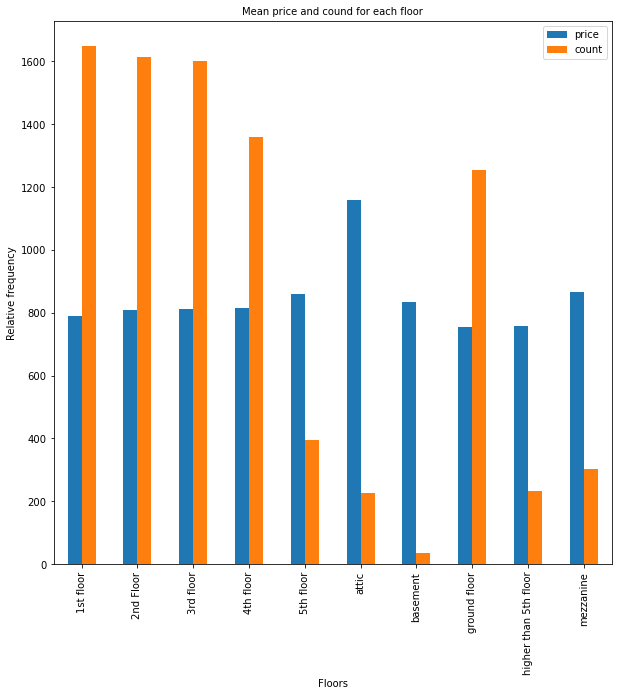

In [3]:
table = df.groupby('floor').agg({'price':'mean','floor':'count'}).rename(columns={'floor':'count'})
table.plot(kind='bar',figsize=(10,10))

plt.title('Mean price and cound for each floor',fontsize = 10)
plt.xlabel('Floors')
plt.ylabel('Relative frequency')

Graph idea taken from https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization

Text(0, 0.5, 'Relative frequency')

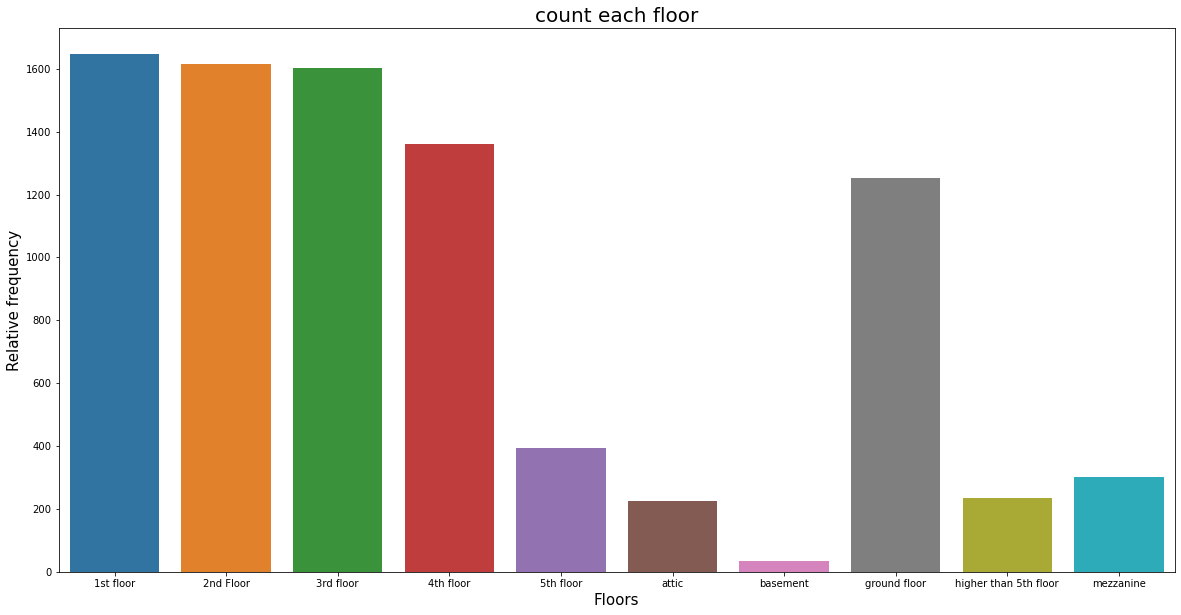

In [4]:

plt.figure(figsize=(20, 10))
sns.countplot(x="floor", data=df, order = df.groupby(by=['floor'])['floor'].count().index)
#plt.ylabel('sum',rotation=0)

plt.title('count each floor',fontsize = 20)
plt.xlabel('Floors',fontsize = 15)
plt.ylabel('Relative frequency',fontsize = 15)

In [5]:
df['range'] = 0
for i in range(len(df)):
    if ((df['price'][i] >= 200) and (df['price'][i]<500)):
        df['range'][i] = '200 to 500'
        
    if ((df['price'][i] >=500) and (df['price'][i]<800)):
        df['range'][i] = '500 to 800'
        
    if ((df['price'][i] >= 800) and (df['price'][i]<1100)):
        df['range'][i] = '800 to 1100'
        
    if ((df['price'][i] >= 1100) and (df['price'][i]<1500)):
        df['range'][i] = '1100 to 1500'   
        
    if ((df['price'][i] >= 1500) and (df['price'][i]<2000)):
        df['range'][i] = '1500 to 2000'
        
    if ((df['price'][i] >= 2000) and (df['price'][i]<=3300)):
        df['range'][i] = '2000 to 3300'

<ipython-input-5-b5bb1ef08ad8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'][i] = '800 to 1100'
D:\Programs\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-5-b5bb1ef08ad8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'][i] = '500 to 800'
<ipython-input-5-b5bb1ef08ad8>:16: SettingWithCopyWarning: 

Text(0, 0.5, 'count')

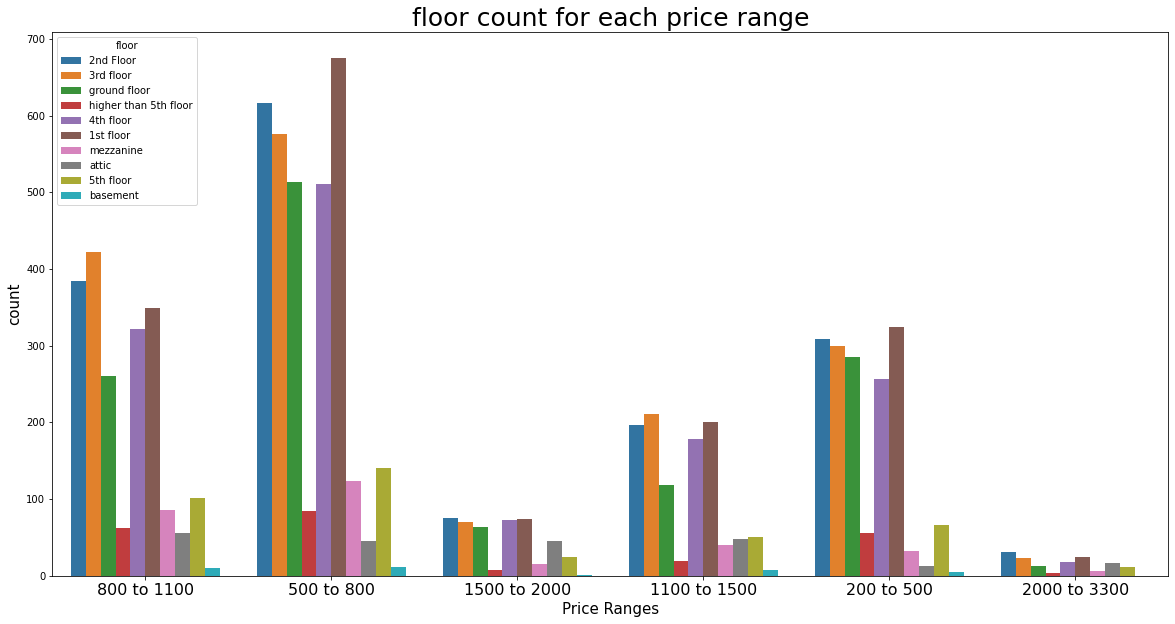

In [6]:
plt.figure(figsize=(20, 10))
sns.countplot(x="range", data=df, hue='floor')
plt.xticks(size=16, rotation=0)

plt.title('floor count for each price range',fontsize = 25)
plt.xlabel('Price Ranges',fontsize = 15)
plt.ylabel('count',fontsize = 15)

Text(0, 0.5, 'count')

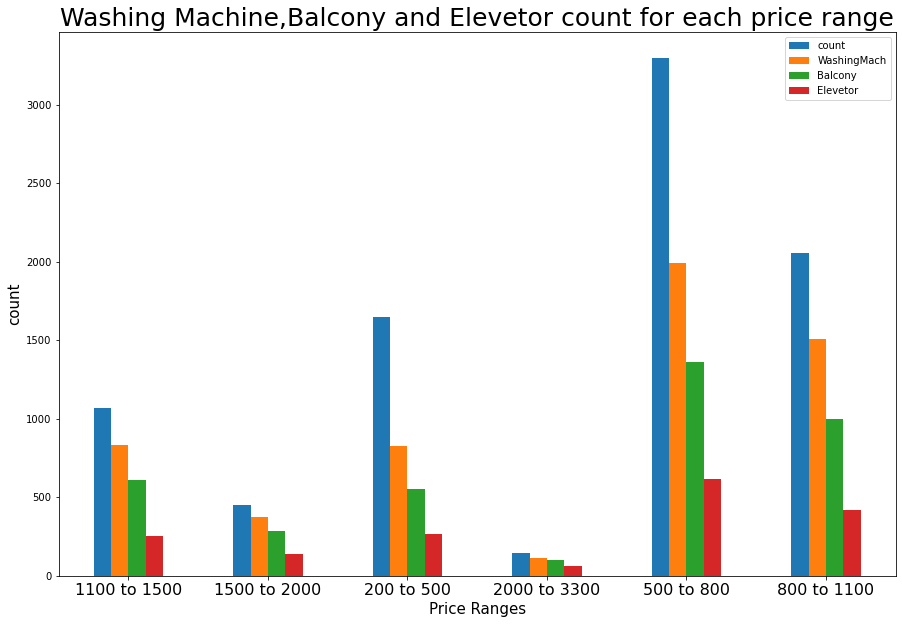

In [7]:
table = df.groupby('range').agg({'price':'count','WashingMach':'sum','Balcony':'sum','Elevetor':'sum',}).rename(columns={'price':'count'})
table.plot(kind='bar',figsize=(15,10))

plt.xticks(size=16, rotation=0)
plt.title('Washing Machine,Balcony and Elevetor count for each price range',fontsize = 25)
plt.xlabel('Price Ranges',fontsize = 15)
plt.ylabel('count',fontsize = 15)

Text(0.5, 1.0, 'Number of apartments by Washing Machine, Balcony, Elevetor by this order')

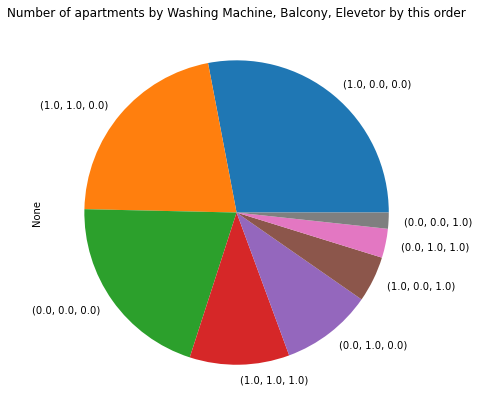

In [8]:
fig2 = plt.figure(figsize=(7,7))
df[['WashingMach','Balcony','Elevetor']].value_counts().plot(kind='pie')
plt.title('Number of apartments by Washing Machine, Balcony, Elevetor by this order')

<Figure size 432x288 with 0 Axes>

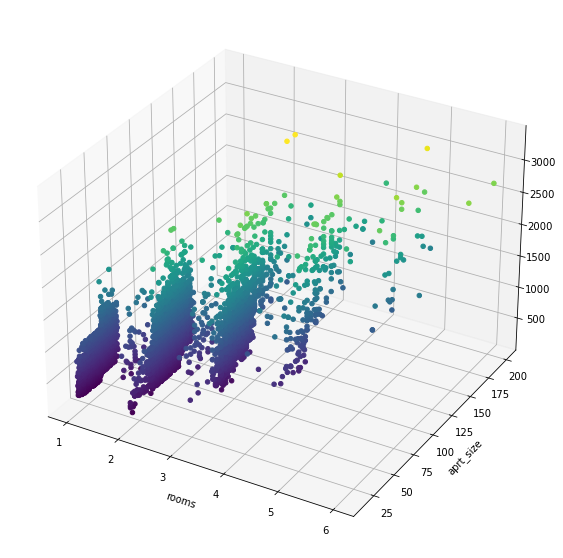

In [9]:
#%matplotlib notebook

fig = plt.figure()
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

#Data for three-dimensional scattered points
xdata = df['rooms'] ##
ydata = df['aprt_size'] #
zdata = df.price

plt.xlabel('rooms') ##
plt.ylabel('aprt_size') #
ax.scatter3D(xdata, ydata, zdata, c=zdata, depthshade=False)




graph idea taken from : https://www.youtube.com/watch?v=fRTHshCj-L0&ab_channel=MichaelFore

In [10]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',color="price")
fig.update_layout(mapbox_style='open-street-map')

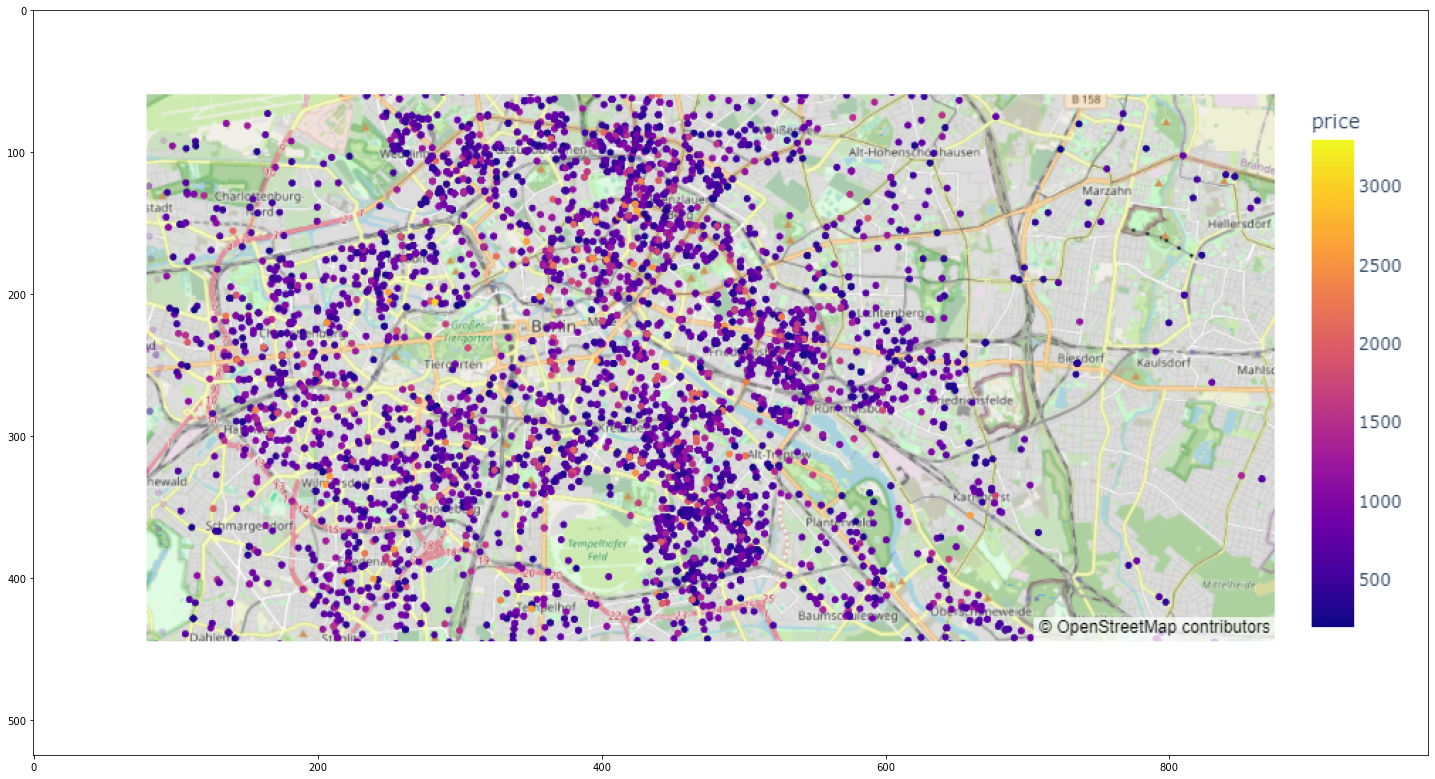

In [16]:
plt.figure(figsize=(25, 15))
img = mpimg.imread(r'C:\Users\Kostya\Downloads\newplot (1).png')
imgplot = plt.imshow(img)
plt.show()

In [11]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',color="floor")
fig.update_layout(mapbox_style='open-street-map')

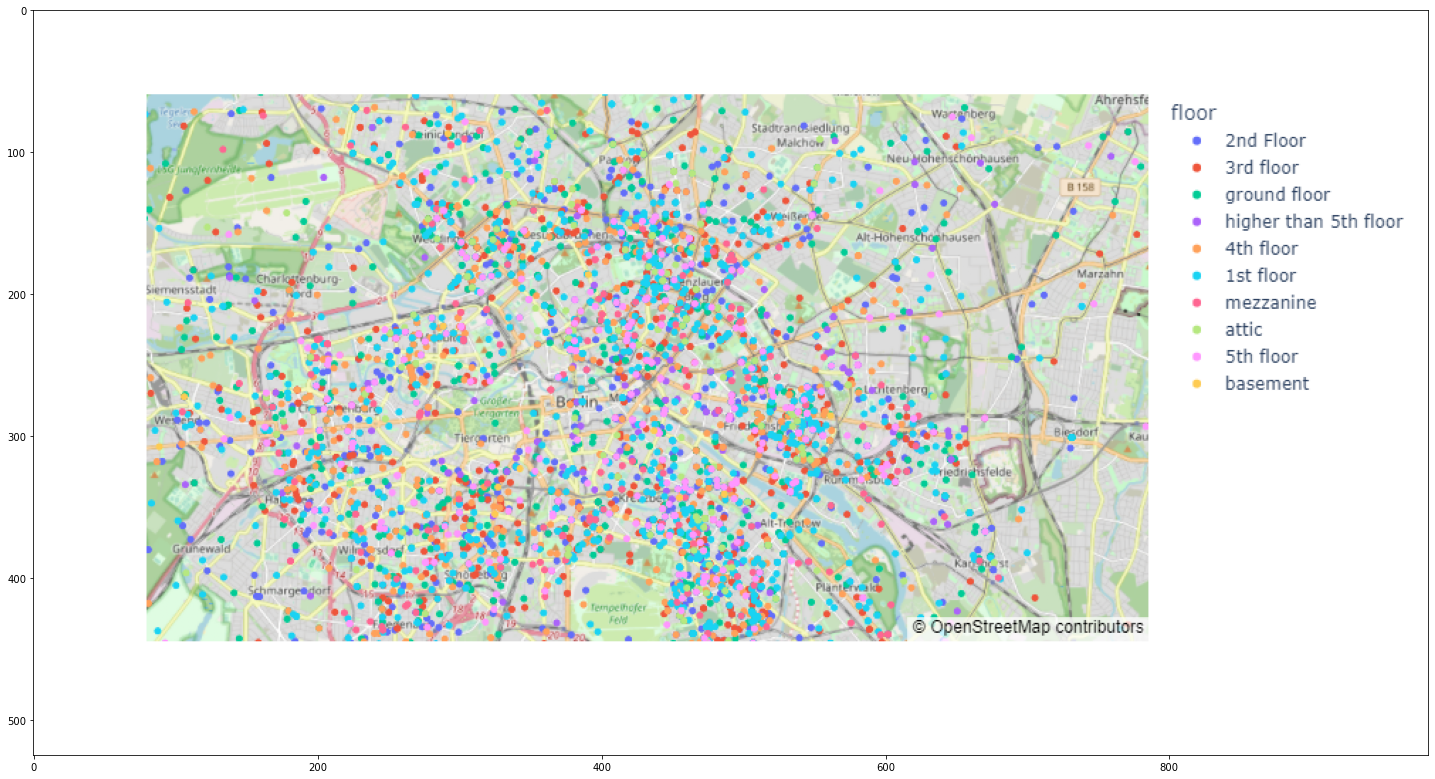

In [17]:
plt.figure(figsize=(25, 15))
img = mpimg.imread(r'C:\Users\Kostya\Downloads\newplot (2).png')
imgplot = plt.imshow(img)
plt.show()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df = pd.read_csv(r'C:\Users\eliko\OneDrive\שולחן העבודה\ds\finalClean3.csv')
df

aprt_size  rooms   price  longitude   latitude  WashingMach  Balcony  \
0          33.0    1.0   850.0  13.502420  52.507540          1.0      1.0   
1          40.0    1.5   850.0  13.351857  52.500805          1.0      0.0   
2          35.0    1.0   799.0  13.295509  52.473641          1.0      0.0   
3          33.0    1.0   819.0  13.265390  52.458389          1.0      1.0   
4          26.0    1.0   600.0  13.513513  52.505395          1.0      1.0   
...         ...    ...     ...        ...        ...          ...      ...   
8662       65.0    2.0   700.0  13.323692  52.492764          1.0      1.0   
8663       77.0    2.0   900.0  13.206772  52.499587          1.0      1.0   
8664      105.0    3.5  1200.0  13.320107  52.472577          1.0      0.0   
8665       56.0    1.0   742.0  13.466438  52.519140          0.0      0.0   
8666       74.0    2.0   710.0  13.178733  52.539997          0.0      1.0   

      Elevetor  parking  bus_walking  ... kitchen_own kitchen  \
0          0.0      0.0          3.0  ...                   1   
1          0.0      0.0         12.0  ...                   1   
2          1.0      0.0         11.0  ...                   0   
3          1.0      0.0         15.0  ...                   0   
4          1.0      0.0          1.0  ...                   1   
...        ...      ...          ...  ...                 ...   
8662       0.0      0.0          9.0  ...                   0   
8663       1.0      0.0         10.0  ...                   1   
8664       0.0      1.0         12.0  ...                   1   
8665       0.0      0.0          4.0  ...                   1   
8666       0.0      0.0         14.0  ...                   1   

      kitchen_shared kitchen  heating Type_Kohleofen  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
8662                       0                       0   
8663                       0                       0   
8664                       0                       0   
8665                       0                       0   
8666                       0                       0   

      heating Type_Unavailable  heating Type_central heating  \
0                            0                             1   
1                            1                             0   
2                            1                             0   
3                            1                             0   
4                            0                             1   
...                        ...                           ...   
8662                         1                             0   
8663                         1                             0   
8664                         0                             0   
8665                         0                             0   
8666                         0                             1   

      heating Type_coal stove  heating Type_district heating  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   
...                       ...                            ...   
8662                        0                              0   
8663                        0                              0   
8664                        0                              0   
8665                        1                              0   
8666                        0                              0   

      heating Type_furnace heating  heating Type_gas heating  \
0            

scaling the exact columns we want from the dataframe

In [26]:
scale = StandardScaler()
to_be_scaled_list = ['dist','aprt_size']
for cat in to_be_scaled_list:
    vec = np.array(df[cat])
    vec = vec.reshape(-1, 1)
    transformed_data = scale.fit_transform(vec)
    df[cat] = transformed_data

dataframe after scaling

In [27]:
df

aprt_size  rooms   price  longitude   latitude  WashingMach  Balcony  \
0     -1.008090    1.0   850.0  13.502420  52.507540          1.0      1.0   
1     -0.680919    1.5   850.0  13.351857  52.500805          1.0      0.0   
2     -0.914613    1.0   799.0  13.295509  52.473641          1.0      0.0   
3     -1.008090    1.0   819.0  13.265390  52.458389          1.0      1.0   
4     -1.335262    1.0   600.0  13.513513  52.505395          1.0      1.0   
...         ...    ...     ...        ...        ...          ...      ...   
8662   0.487551    2.0   700.0  13.323692  52.492764          1.0      1.0   
8663   1.048417    2.0   900.0  13.206772  52.499587          1.0      1.0   
8664   2.357104    3.5  1200.0  13.320107  52.472577          1.0      0.0   
8665   0.066902    1.0   742.0  13.466438  52.519140          0.0      0.0   
8666   0.908201    2.0   710.0  13.178733  52.539997          0.0      1.0   

      Elevetor  parking  bus_walking  ... kitchen_own kitchen  \
0          0.0      0.0          3.0  ...                   1   
1          0.0      0.0         12.0  ...                   1   
2          1.0      0.0         11.0  ...                   0   
3          1.0      0.0         15.0  ...                   0   
4          1.0      0.0          1.0  ...                   1   
...        ...      ...          ...  ...                 ...   
8662       0.0      0.0          9.0  ...                   0   
8663       1.0      0.0         10.0  ...                   1   
8664       0.0      1.0         12.0  ...                   1   
8665       0.0      0.0          4.0  ...                   1   
8666       0.0      0.0         14.0  ...                   1   

      kitchen_shared kitchen  heating Type_Kohleofen  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
8662                       0                       0   
8663                       0                       0   
8664                       0                       0   
8665                       0                       0   
8666                       0                       0   

      heating Type_Unavailable  heating Type_central heating  \
0                            0                             1   
1                            1                             0   
2                            1                             0   
3                            1                             0   
4                            0                             1   
...                        ...                           ...   
8662                         1                             0   
8663                         1                             0   
8664                         0                             0   
8665                         0                             0   
8666                         0                             1   

      heating Type_coal stove  heating Type_district heating  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   
...                       ...                            ...   
8662                        0                              0   
8663                        0                              0   
8664                        0                              0   
8665                        1                              0   
8666                        0                              0   

      heating Type_furnace heating  heating Type_gas heating  \
0            

split the dataframe to X and Y and after that we split them to train and test in order to test it on a regression model

In [28]:
X = df.drop(['price','url'],axis=1)
y = df.price

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

correlations table of all the dataframe columns

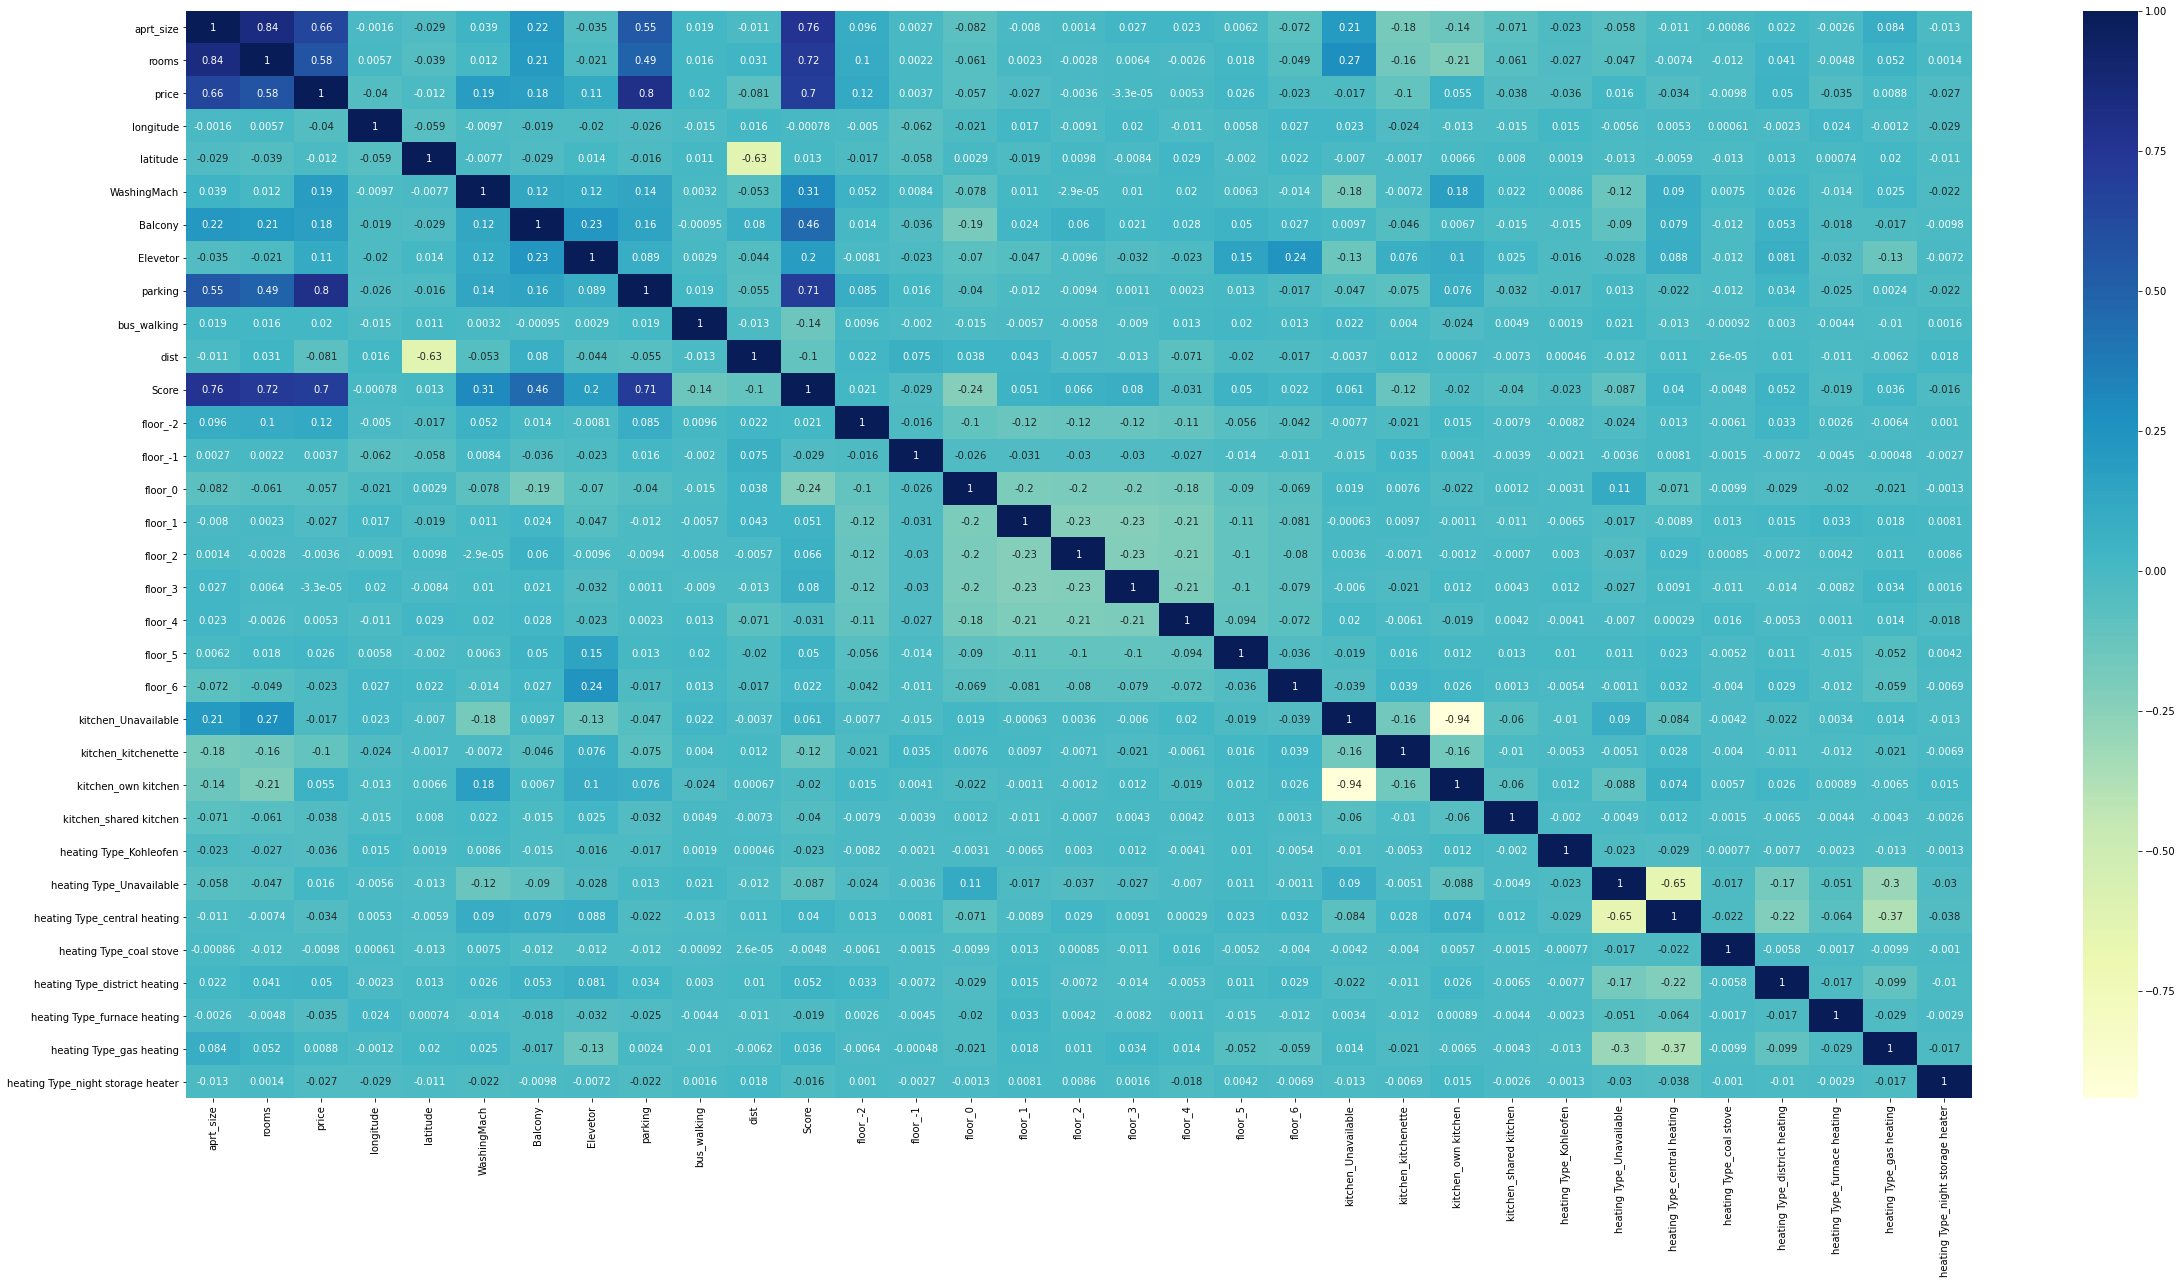

In [30]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [31]:
df.corr()

aprt_size     rooms     price  longitude  \
aprt_size                           1.000000  0.840153  0.657621  -0.001637   
rooms                               0.840153  1.000000  0.575255   0.005701   
price                               0.657621  0.575255  1.000000  -0.039804   
longitude                          -0.001637  0.005701 -0.039804   1.000000   
latitude                           -0.029041 -0.039484 -0.011981  -0.059485   
WashingMach                         0.039036  0.011608  0.192541  -0.009730   
Balcony                             0.223770  0.211270  0.175654  -0.019134   
Elevetor                           -0.034621 -0.020575  0.106343  -0.019574   
parking                             0.546653  0.489669  0.799415  -0.025693   
bus_walking                         0.018648  0.016094  0.019561  -0.015391   
dist                               -0.010896  0.030752 -0.080598   0.015784   
Score                               0.759449  0.720259  0.701799  -0.000777   
floor_-2                            0.096073  0.101037  0.116228  -0.005036   
floor_-1                            0.002729  0.002168  0.003711  -0.061785   
floor_0                            -0.082366 -0.061100 -0.056769  -0.020782   
floor_1                            -0.007965  0.002279 -0.026584   0.017187   
floor_2                             0.001431 -0.002835 -0.003551  -0.009127   
floor_3                             0.026842  0.006431 -0.000033   0.020215   
floor_4                             0.023125 -0.002638  0.005287  -0.011364   
floor_5                             0.006187  0.018318  0.026454   0.005791   
floor_6                            -0.072235 -0.048938 -0.022512   0.026673   
kitchen_Unavailable                 0.209929  0.273068 -0.017460   0.023168   
kitchen_kitchenette                -0.176242 -0.164102 -0.102684  -0.024473   
kitchen_own kitchen                -0.144592 -0.212801  0.055152  -0.013464   
kitchen_shared kitchen             -0.070729 -0.061446 -0.037774  -0.014928   
heating Type_Kohleofen             -0.022623 -0.027442 -0.036257   0.015075   
heating Type_Unavailable           -0.058396 -0.047369  0.016051  -0.005624   
heating Type_central heating       -0.010504 -0.007424 -0.034232   0.005346   
heating Type_coal stove            -0.000863 -0.011531 -0.009810   0.000609   
heating Type_district heating       0.021616  0.040556  0.049883  -0.002278   
heating Type_furnace heating       -0.002644 -0.004771 -0.034926   0.023635   
heating Type_gas heating            0.083583  0.052182  0.008820  -0.001177   
heating Type_night storage heater  -0.012653  0.001417 -0.027034  -0.029457   

                                   latitude  WashingMach   Balcony  Elevetor  \
aprt_size                         -0.029041     0.039036  0.223770 -0.034621   
rooms                             -0.039484     0.011608  0.211270 -0.020575   
price                             -0.011981     0.192541  0.175654  0.106343   
longitude                         -0.059485    -0.009730 -0.019134 -0.019574   
latitude                           1.000000    -0.007746 -0.029287  0.014091   
WashingMach                       -0.007746     1.000000  0.122790  0.118947   
Balcony                           -0.029287     0.122790  1.000000  0.227453   
Elevetor                           0.014091     0.118947  0.227453  1.000000   
parking                           -0.016445     0.142902  0.156738  0.088971   
bus_walking                        0.011437     0.003177 -0.000948  0.002902   
dist                              -0.628139    -0.053416  0.079853 -0.044142   
Score                              0.012519     0.307194  0.459733  0.199614   
floor_-2                          -0.017132     0.052492  0.014243 -0.008137   
floor_-1                          -0.057984     0.008428 -0.035695 -0.023045   
floor_0                            0.002870    -0.078187 -0.190328 -0.070233   
floor_1                           -0.018887     0.010777  0.023827 -

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667 entries, 0 to 8666
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   aprt_size                          8667 non-null   float64
 1   rooms                              8667 non-null   float64
 2   price                              8667 non-null   float64
 3   longitude                          8667 non-null   float64
 4   latitude                           8667 non-null   float64
 5   WashingMach                        8667 non-null   float64
 6   Balcony                            8667 non-null   float64
 7   Elevetor                           8667 non-null   float64
 8   parking                            8667 non-null   float64
 9   bus_walking                        8667 non-null   float64
 10  url                                8667 non-null   object 
 11  dist                               8667 non-null   float

our first model: Linear Regression

In [33]:
regr =LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print("r2: %.2f" % r2_score(y_test, y_pred))

r2: 0.73


Lasso Regressor

In [34]:
las=Lasso(alpha=0.0001)
las.fit(X_train,y_train)
y_pred=las.predict(X_test)
print("r2: %.2f" % r2_score(y_test, y_pred))

r2: 0.73


C:\Users\eliko\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48868642.60058591, tolerance: 107007.69255528632
  model = cd_fast.enet_coordinate_descent(


Random Forest Regressor

In [35]:
regr = RandomForestRegressor()
regr.fit(X=X_train, y=y_train)
predicted_tree_rand=regr.predict(X_test)
print("r2: %.2f" % r2_score(y_test, predicted_tree_rand))

r2: 0.75


we can see that all the models bring mostly the same range of score.

now were going to show you some of the predictions.

In [36]:
def testTheTest(test_val,predicted_val):
    testColumn={}
    testColumn["Predicted"] = predicted_val
    testColumn["Test"] = test_val
    df1 = pd.DataFrame(testColumn)
    df1.reset_index(inplace=True)
    del df1["index"]
    df1=df1.astype(float)
    return df1

In [37]:
val={}
val=testTheTest(y_test,predicted_tree_rand)
print(val.head(200))

     Predicted   Test
0       750.43  500.0
1       585.56  559.0
2       701.55  550.0
3       655.31  537.0
4       596.20  900.0
..         ...    ...
195     567.58  915.0
196     618.04  666.0
197     690.01  800.0
198     601.20  400.0
199     660.26  500.0

[200 rows x 2 columns]
